<a href="https://colab.research.google.com/github/fabiorolim/dados_meteorologicos_oeiras/blob/master/dados_meteorol%C3%B3giocos_oeiras_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/ICON%20APP%20tempo%20IFPI%20Oeiras.png?raw=true" height="80px" width="80px">

# Análise dos dados meteorológicos de 2019 em Oeiras, Piauí.







<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/daves.jpg?raw=true" height="220px" width="420px">

Este artigo apresenta uma análise dos dados meteorologicos do ano de 2019, da cidade de Oeiras - PI, coletados apartir da estação meteorologica [Daves Vantage Pro 2](https://www.davisinstruments.com/solution/vantage-pro2/), instalada no Instituto Federal do Piauí, Campus Oeiras.

Um raspiberry pi conectado ao console da estação envia os dados da primeira leitura do dia para o sistema online, às 00h:05m, as demais leituras são realizadas a cada 30 minutos, exceto a última do dia às 23h:59m.

Todos os dados utilizados neste estudo podem ser acessados através do nosso [sistema online](http://tempo-ifpi-oerias.herokuapp.com) ou [aplicação para dispositivos móveis](https://ifpi-tempo-oeiras.firebaseapp.com).

## A cidade
<img src="https://github.com/fabiorolim/dados_meteorologicos_oeiras/blob/master/IMG_6955.jpg?raw=true" height="220px" width="420px">

Oeiras é um município brasileiro do estado do Piauí, localizado na latitude 07º01'30" sul e longitude 42º07'51" oeste. A cidade possui 2.720km² de extensão territórial e está situada bem ao centro do estado.

O clima tropical semiárido é predominante na região do municipio piauiense, onde nos meses mais quentes, as temperaturas chegam a ultrapassar os 40⁰C.

O Rio Canindé, que corta a primeira capital do estado, é temporario, seu volume de águas está mais elevado na época das chuvas, que se concentram em torno de 4 meses do ano.



## Obtenção dos dados

Os dados analizados foram obtidos por meio de download em nosso [sistema online](http://tempo-ifpi-oerias.herokuapp.com/download). Para baixar o arquivo em formato cvs é necessário informar o intervalo de datas desejado. A data inicial informada no sistema foi 23/03/2019 (dia em que o sistema passou a operar) e a data final foi 31/12/2019. Após download, o arquivo baixado foi anexado a um projeto no [github](https://https://raw.githubusercontent.com/fabiorolim/dados_meteorologicos_oeiras/master/dados.csv) para facilitar o acesso.





### Importando os dados



In [0]:
# Importandos bibiotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Cria dataframe com o csv através do pandas
df = pd.read_csv('https://raw.githubusercontent.com/fabiorolim/dados_meteorologicos_oeiras/master/dados.csv', parse_dates=True, index_col='Datetime')

## Informações acerca do banco de dados

A base de dados é composta por 13.170 linhas ou registros, cada um corresponde a uma leitura feita pela estação, e 22 colunas ou variáveis.

In [17]:
# Obtem informações sobre os dados
print('Informação sobre a base dados')
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Informação sobre a base dados
Número de linhas: 13170
Número de colunas: 22


In [18]:
# Exibe 5 entradas do banco de dados
df.head()

,id,Data_add,BarTrend,Barometer,TempOut,WindSpeed,WindSpeed10Min,WindDir,HumOut,RainRate,SolarRad,RainDay,RainMonth,RainYear,ETDay,ETMonth,ETYear,RainStorm,HeatIndex,WindChill,THSWIndex,Station
Datetime,,,,,,,,,,,,,,,,,,,,,,
2019-08-28 00:35:03.748373,7439,2019-08-28,0.0,29.908,26.3,0,1,325,56.0,NaN,0.0,0.0,0.0,1049.2,0.0,170.9,1078.7,NaN,26.7,26.1,25.6,1
2019-08-29 06:35:04.113947,7500,2019-08-29,20.0,29.911,23.8,5,5,339,63.0,NaN,120.0,0.0,0.0,1049.2,0.6,177.5,1085.3,NaN,24.4,23.9,25.0,1
2019-08-30 07:05:03.634764,7549,2019-08-30,60.0,29.928,25.7,0,2,318,65.0,NaN,264.0,0.0,0.0,1049.2,0.4,184.9,1092.7,NaN,26.7,25.6,29.4,1
2019-08-30 19:35:03.679511,7574,2019-08-30,20.0,29.826,30.8,0,0,322,37.0,NaN,0.0,0.0,0.0,1049.2,6.2,184.9,1092.7,NaN,30.6,31.1,29.4,1
2019-08-31 01:05:03.408294,7586,2019-08-31,0.0,29.844,27.3,6,3,323,46.0,NaN,0.0,0.0,0.0,1049.2,0.1,191.5,1099.3,NaN,27.2,27.2,26.7,1


### Dicionário de dados

A listagem abaixo auxilia na compreensão das variáveis do banco de dados. 

*   **Datetime**: Tempo preciso em que a leitura ocorreu em formato americano;
*   **id:** Identificador único da leitura;
*   **Data_add:** Data em que a leitura ocorreu em formato americano;
*   **BarTrend:** Tendência da pressão para 3h;
*   **Barometer:** Pressão barométrica;
*   **TempOut:** Temperatura do ar em grau em (⁰C);
*   **WindSpeed:** Velocidade do vento em (km/h);
*   **WindSpeed10Min:** Média de velocidade do vento nos últimos 10 minutos em (km/h);
*   **WindDir:** Direção do vento em (⁰);
*   **HumOut:** Umidade relativa do ar em (%);
*   **RainRate:** Volume de chuva por hora em (mm);
*   **SolarRad:** Radiação solar em (W/m²);
*   **RainDay:** Volume de chuva acumulado no dia em (mm);
*   **RainMonth:** Volume de chuva acumulado no Mês em (mm);
*   **RainYear:** Volume de chuva acumulado no ano em (mm);
*   **ETDay:** Volume de evapotranspiração acumulado no dia em (mm);
*   **ETMonth:** Volume de evapotranspiração acumulado no mês em (mm);
*   **ETYear:** Volume de evapotranspiração acumulado no ano em (mm);
*   **RainStorm:** Volume de chuva considerada tempestade em (mm);
*   **HeatIndex:** Índice de calor em (⁰C);
*   **WindChill:** Sensação térmica considerando vento em (⁰C);
*   **THSWIndex:** Sensação térmica considerando umidade, radiação solar, vento e temperatura em (⁰C);
*   **Station:** Identificador da estação meteorológica.

## Distribuição das variáveis

A virificação da distribuição dos dados é permite detectar anomalias e outliers que possam comprometer a análise. 

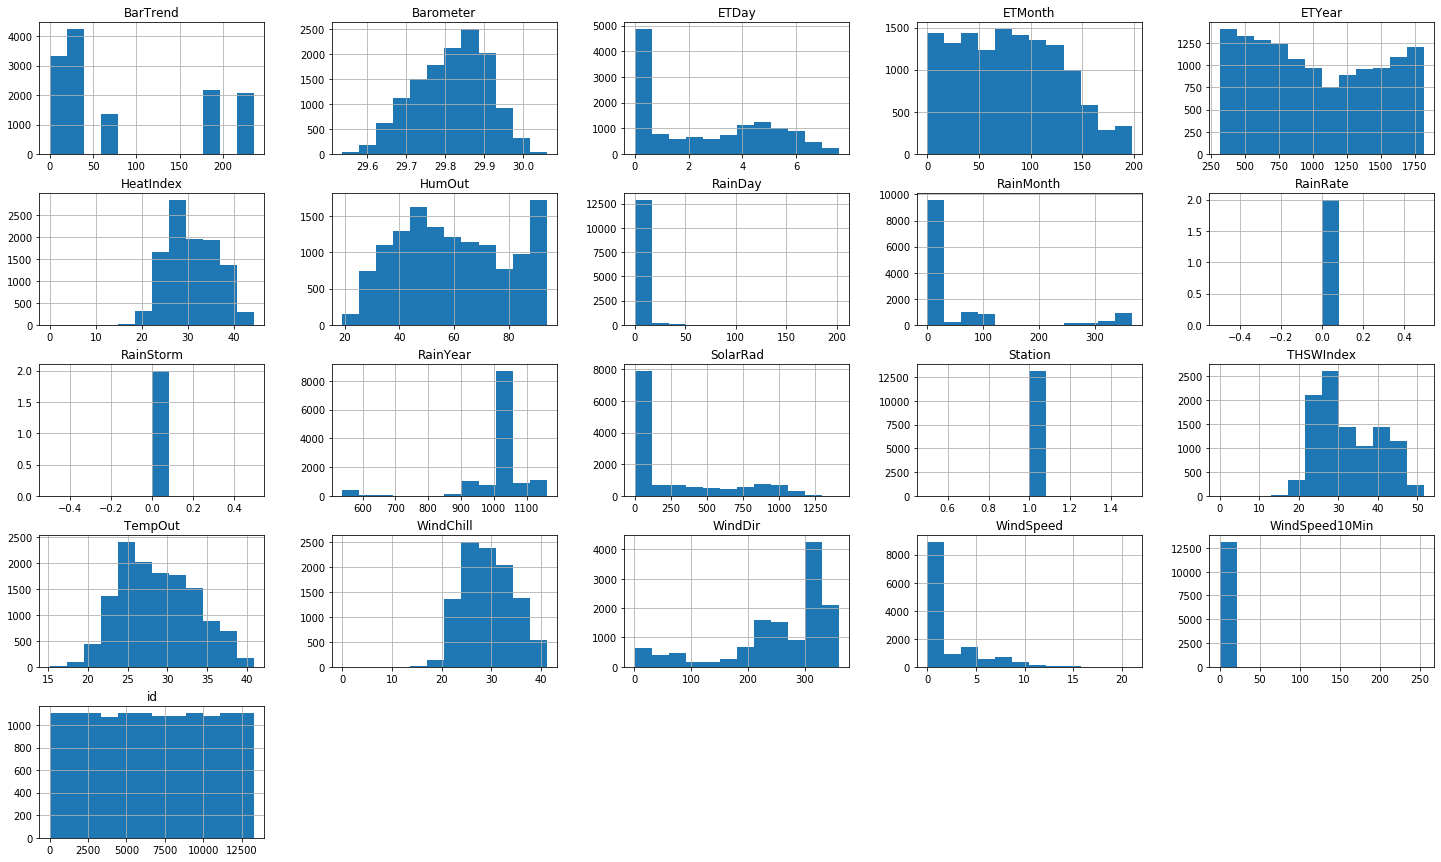

In [19]:
# Cria histogramas com as variáveis do banco de dados
df.hist(figsize=(25, 15), bins=12);

## Removendo dados

Removeu-se algumas váriáveis que não serão utilizadas para análise no momento incluindo aquelas que possuem valores nulos. 



In [20]:
# Exibe todas as variáveis e o percentual de valores nulos 
print(f'{(df.isnull().sum()/df.shape[0])*100}')

id                 0.000000
Data_add           0.000000
BarTrend           0.000000
Barometer          0.000000
TempOut            0.000000
WindSpeed          0.000000
WindSpeed10Min     0.000000
WindDir            0.000000
HumOut             0.000000
RainRate          99.984814
SolarRad           0.000000
RainDay            0.000000
RainMonth          0.000000
RainYear           0.000000
ETDay              0.000000
ETMonth            0.000000
ETYear             0.000000
RainStorm         99.984814
HeatIndex         21.359150
WindChill         21.359150
THSWIndex         21.359150
Station            0.000000
dtype: float64


In [21]:
# Cria uma cópia do dataframe original
df_clean = df.copy()
# Remove todas as variáveis com dados nulos e que não serão utilizadas na análise. 
df_clean = df_clean.drop(columns=['id', 'RainRate', 'RainStorm', 'BarTrend', 'Barometer', 'WindSpeed10Min', 'Station', 'HeatIndex', 'WindChill', 'THSWIndex'])
display(df_clean.head())


,Data_add,TempOut,WindSpeed,WindDir,HumOut,SolarRad,RainDay,RainMonth,RainYear,ETDay,ETMonth,ETYear
Datetime,,,,,,,,,,,,
2019-08-28 00:35:03.748373,2019-08-28,26.3,0,325,56.0,0.0,0.0,0.0,1049.2,0.0,170.9,1078.7
2019-08-29 06:35:04.113947,2019-08-29,23.8,5,339,63.0,120.0,0.0,0.0,1049.2,0.6,177.5,1085.3
2019-08-30 07:05:03.634764,2019-08-30,25.7,0,318,65.0,264.0,0.0,0.0,1049.2,0.4,184.9,1092.7
2019-08-30 19:35:03.679511,2019-08-30,30.8,0,322,37.0,0.0,0.0,0.0,1049.2,6.2,184.9,1092.7
2019-08-31 01:05:03.408294,2019-08-31,27.3,6,323,46.0,0.0,0.0,0.0,1049.2,0.1,191.5,1099.3


## Análise da temperatura

In [22]:
# Exibe informações estatisticas acerca da temperatura do ar
df_clean.TempOut.describe()

count    13170.000000
mean        28.788633
std          4.679261
min         15.200000
25%         25.000000
50%         28.300000
75%         32.300000
max         40.900000
Name: TempOut, dtype: float64

Como visto acima, a média de temperatura anual da cidade de Oeiras, em 2019 foi de 28,7 ⁰C, a menor temperatura registrada foi de 15,2 ⁰C, equanto a maior foi 40,9 ⁰C. 
Através do gráfico abaixo pode-se vizualizar a amplitude dos valores da temperatura, a mediana e os valores predominantes.

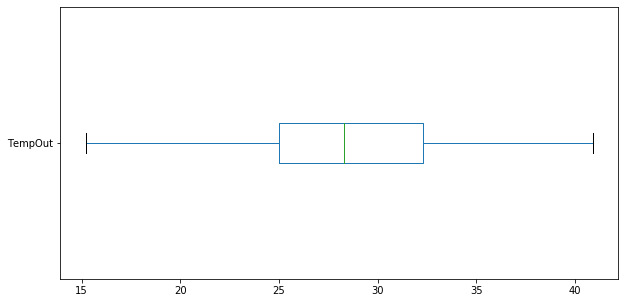

In [23]:
#Boxplot para TempOut
df_clean.TempOut.plot(kind='box', vert=False, figsize=(10, 5))
plt.show()

### Qual dia do ano registrou a temperatura mais alta ?


In [24]:
# Retorna o Datetime correspoendete ao maior valor de TempOut
df_clean.loc[df_clean.TempOut == df_clean.TempOut.max(), ['TempOut']]


,TempOut
Datetime,
2019-11-06 14:35:03.819651,40.9


A maior temperatura do ano foi 40,9 ⁰C, registrada no dia 06/11/2019 às 14h:35m.

### Qual dia do ano registrou a temperatura mais baixa ?

In [25]:
# Retorna o Datetime correspoendete ao menor valor de TempOut
df_clean.loc[df_clean.TempOut == df_clean.TempOut.min(), ['TempOut']]

,TempOut
Datetime,
2019-07-17 06:05:03.271811,15.2


A menor temperatura do ano foi 15,2 ⁰C, registrada no dia 17/07/2019 às 06h:05m.

### Qual foi o dia com a maior média de temperatura ?

In [26]:
dias_media_temperatura = df_clean.groupby(['Data_add']).TempOut.mean().sort_values()
display(dias_media_temperatura[-1:])

Data_add
2019-12-23    34.378125
Name: TempOut, dtype: float64

O dia 23/12/2019 registrou a maior média de temperatura com 34,37 ⁰C.

### Qual foi o dia com a menor média de temperatura?

In [27]:
display(dias_media_temperatura[:1])

Data_add
2019-05-18    24.02
Name: TempOut, dtype: float64

O dia 18/05/2019 registrou a menor média de temperatura com 24,02 ⁰C.

### Quais as médias de temperaturas em cada mês ?

In [28]:
# Agrupa os dados por mês e retorna calcula a média de temperatura 
temperaturas_meses = df_clean.groupby(by=[df_clean.index.month]).TempOut.mean().sort_index()
display(temperaturas_meses.sort_values(ascending=False))

Datetime
10    31.229967
11    30.995436
9     30.952968
12    29.972826
8     29.016133
7     27.390861
3     26.852604
4     26.801279
6     26.670453
5     26.582195
Name: TempOut, dtype: float64

Conforme a lista acima, outubro foi o mês com a maior média de temperatura com 31,22 ⁰C, seguido por novembro, com 30,99 ⁰C e setembro com 30,95 ⁰C.  Já o mês de maio registrou 26,58 ⁰C, a menor média de temperatura.

O gráfico abaixo o possbilita a visualização das médias de temperaturas durante o ano.


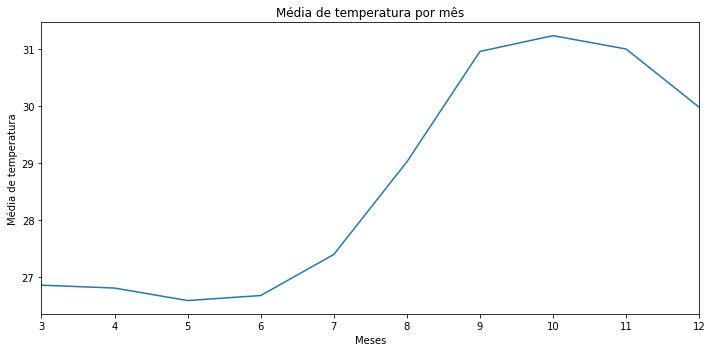

In [29]:
# Plota o gráfico de médias de temperaturas por mês
fig, ax = plt.subplots(figsize=(10, 5))
temperaturas_meses.plot(kind='line', ax=ax)
ax.set_title('Média de temperatura por mês')
ax.set_xlabel('Meses')
ax.set_ylabel('Média de temperatura')
plt.tight_layout()

## Análise das chuvas

Conforme o gráfico abaixo, as chuvas na cidade de Oeiras foram mais concentradas no meses de março, abril, maio e dezembro.

*Para está análise, vale lembrar que a base de dados contém apenas as leituras dos dias 23/03/2019 a 31/12/2019. Entretanto o volume de chuva anual considera todos os dias do ano de 2019.*

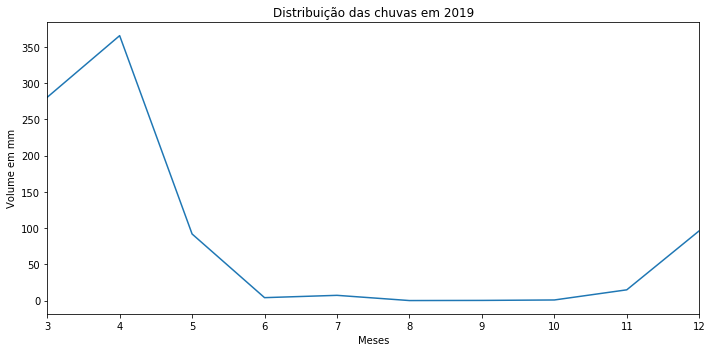

In [30]:
# Retorna os meses em ordem crescente e seus respectivos volumes de chuva
meses_e_chuvas = df_clean.groupby(by=[df_clean.index.month]).RainMonth.max().sort_index() 

#Plota gráfico de linha para chuvas
fig, ax = plt.subplots(figsize=(10,5))
meses_e_chuvas.plot(kind='line', ax=ax)
ax.set_title('Distribuição das chuvas em 2019')
ax.set_xlabel('Meses')
ax.set_ylabel('Volume em mm')
plt.tight_layout()

### Qual foi o volume total de chuvas ?

In [42]:
# Retorna o valor máximo da variável RainYear no dia 31/12/2019.
print(f"O volume total das chuvas em 2019 foi de {df_clean.loc[df_clean.Data_add=='2019-12-31'].RainYear.max()}mm")

O volume total das chuvas em 2019 foi de 1161.2mm


### Quais os meses mais chuvosos ?

In [32]:
#Ordena os meses em ordem crescente de volume de chuva
meses_e_chuvas = meses_e_chuvas.sort_values(ascending=False)
display(meses_e_chuvas)


Datetime
4     365.35
3     280.31
12     96.20
5      91.80
11     14.80
7       7.20
6       4.00
10      0.80
9       0.20
8       0.00
Name: RainMonth, dtype: float64

A listagem acima exibe os meses e seus volumes de chuvas ordenados em ordem decrescente. Abril foi o mês com maior volume de chuvas, com 365,35 mm, seguido por março, com 280,31mm e dezembro com 96,20mm.

###Em quantos dias houve chuvas?

In [33]:
# Retorna uma lista com todos os dias onde a variável RainDay foi maior que 0
dias_chuvosos = (df_clean.loc[df_clean.RainDay > 0, ['Data_add']]).Data_add.unique()

# Quantidade de dias chuvosos
print(f'Em 2019 houve {len(dias_chuvosos)} dias com precipitações')

Em 2019 houve 46 dias com precipitações


### Qual o volume de chuva por dia ?


In [34]:
# Valume de chuva em cada um dos dias
(df_clean.loc[df_clean.RainDay > 0, ['Data_add', 'RainDay']]).groupby(['Data_add']).RainDay.max().sort_values(ascending=False)

Data_add
2019-04-05    202.36
2019-12-08     49.40
2019-04-02     43.31
2019-04-01     41.73
2019-05-17     33.86
2019-05-15     33.86
2019-03-23     28.35
2019-05-01     22.83
2019-04-12     21.26
2019-03-24     18.90
2019-12-17     18.20
2019-04-04     16.54
2019-12-09     12.40
2019-03-25     10.24
2019-04-11     10.24
2019-12-05      7.80
2019-12-04      7.80
2019-03-28      7.09
2019-04-03      6.30
2019-12-30      5.80
2019-07-07      4.80
2019-04-09      4.72
2019-11-18      4.60
2019-06-18      3.80
2019-11-25      3.20
2019-04-13      3.15
2019-11-26      2.60
2019-11-17      2.40
2019-04-15      2.36
2019-11-22      1.60
2019-03-27      1.57
2019-03-26      1.57
2019-03-31      1.57
2019-12-06      1.40
2019-07-03      1.40
2019-07-19      1.00
2019-12-24      1.00
2019-04-07      0.79
2019-04-21      0.79
2019-04-29      0.79
2019-10-22      0.60
2019-12-10      0.20
2019-10-23      0.20
2019-09-29      0.20
2019-06-04      0.20
2019-11-27      0.20
Name: RainDay, dtype: flo

Conforme a lista acima o dia que houve o maior volume de chuva foi 05/04/2019, com 202,36mm, seguido por 08/12/2019, com 49,40mm e 02/04/2019, com 43,31mm. 


## Análise da umidade relativa do ar

A umidade relativa do ar consiste na quantidade de vapor de água existente na atmosfera. O que caracteriza se o ar está seco ou úmido.

O gráfico abaixo apresenta a média da umidade do ar por mês durante o ano de 2019.


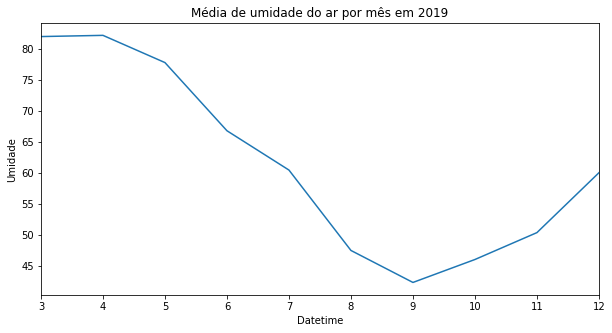

In [35]:
# Calcula a média da umidade por mês
media_umidade_mes = df_clean.HumOut.groupby(by=[df_clean.index.month]).mean()

# PLota o gráfico de média de umidade do ar por mês
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Média de umidade do ar por mês em 2019')
ax.set_xlabel('Mês')
ax.set_ylabel('Umidade')
media_umidade_mes.plot(kind='line', ax=ax);

### Quais as médias de umidade em cada mês ?

In [36]:
display(media_umidade_mes.sort_values(ascending=False))

Datetime
4     82.208427
3     82.013021
5     77.815045
6     66.815241
7     60.470981
12    60.042754
11    50.378976
8     47.498667
10    46.039465
9     42.336160
Name: HumOut, dtype: float64

A listagem acima exibe os meses e suas respectivas médias de umidade relativa do ar em ordem decrescente. Como visto, abril foi o mês com a maior média, com 82,20%, seguido por março, com 82,01% e maio com 77,8%. Setembro foi o mês com o ar mais seco, registrando uma média de 42,33% de umidade.  

### Qual o dia mais úmido e o mais seco do ano ?

In [37]:
# Calcula a média da umidade por dia
medias_umidade_dias = df_clean.HumOut.groupby(by=[df_clean.Data_add]).mean()

# Retorna a data com maior média de umidade
display(medias_umidade_dias.sort_values(ascending=False)[:1])

# Retorna a data com a menor média de umidade
display(medias_umidade_dias.sort_values(ascending=False)[-1:])

Data_add
2019-05-18    90.92
Name: HumOut, dtype: float64

Data_add
2019-09-05    34.652174
Name: HumOut, dtype: float64

Conforme visto acima, 18/05/2019 foi o dia mais úmido do ano, com 90,92% de umidade média, enquanto 05/09/2019 foi o dia mais seco, com 34,65% de umidade média. 

## Análise dos ventos

### Quando e qual foi a maior velocidade do vento ? 

In [38]:
# Retorna o maior valor de WindSpeed
df_clean.loc[df_clean.WindSpeed == df_clean.WindSpeed.max(), ['WindSpeed']]

,WindSpeed
Datetime,
2019-10-12 07:35:04.004310,21


A maior velocidade do vento foi 21km/h, registrada no dia 12/10/2019 às 07h:35m.

### Qual direção do vento é predominante ?

In [39]:
# Vento predominante
df_clean.WindDir.describe()

count    13170.000000
mean       255.155429
std         93.812744
min          1.000000
25%        226.000000
50%        297.000000
75%        322.000000
max        360.000000
Name: WindDir, dtype: float64

Como visto acima, a direção o vento predominante é 322⁰. O gráfico abaixo mostra a frequência em relação a direção do vento.


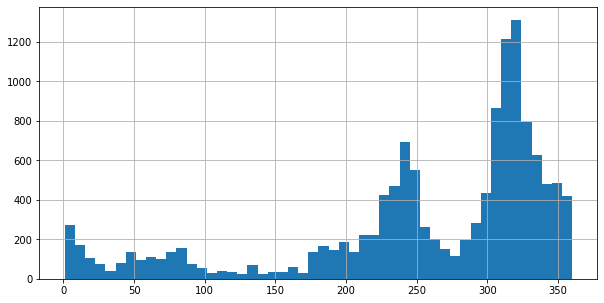

In [40]:
df_clean.WindDir.hist(figsize=(10, 5), bins=50, grid=True);

Observando o gráfico abaixo, verifica-se que o NO (Noroeste) foi a direção predominante do vento.

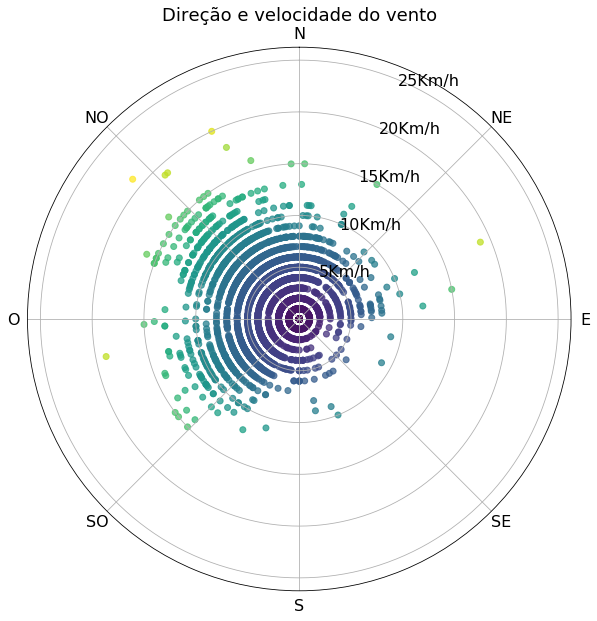

In [41]:
import numpy as np

direcao = df_clean.WindDir.sort_index()

velocidade = df_clean.WindSpeed.sort_index()

graus = direcao * np.pi / 180
cor = velocidade

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1, projection='polar')
ax.set_title('Direção e velocidade do vento', fontdict={'fontsize': '18', 'verticalalignment': 'center_baseline'})
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SO', 'O', 'NO'], fontdict={'fontsize': '16', 'verticalalignment': 'center_baseline', 'horizontalalignment': 'center'})
ax.set_xmargin(0.2)
ax.set_yticklabels(['5Km/h', '10Km/h', '15Km/h', '20Km/h', '25Km/h'], fontdict={'fontsize': '16', 'verticalalignment': 'center_baseline'} )
c = ax.scatter(graus, velocidade, c=cor, alpha=0.75)
